<h1>Numeric integration based on interpolation.</h1>

<p>The process of integration has an <em>easy</em> answer: $\int_a^b f(x) dx = F(b) - F(a)$ <em>when</em> you can find an antiderivative $F$. But that isn't always the case.</p>

<blockquote>
<p>The <a href="https://en.wikipedia.org/wiki/Risch_algorithm">Risch algorithm</a> characterizes when an <em>elementary</em> function has an antiderivative of a specific form.  The original problem is posed by Liouville. Not all elementary functions (functions obtained by composing exponentials, logarithms, radicals, trigonometric functions, and the four arithmetic operations (+ − × ÷)) are integrable. For example, $f(x) = \exp(x^2)$.</p>
</blockquote>

<h2>What to do when you can't find an antiderivative?</h2>

<p>We can approximate an integral a few ways. First, if we approximate $f$ by $g$, then $\int_a^b f(x) dx \approx \int_a^b g(x) dx$.</p>

<p>For example, if we approximate $\sin(x)$ by its Taylor polynomial of degree $5$ we get an approximation.</p>

In [1]:
using Roots
using Polynomials
f(x) = sin(x)
x = poly([0.0])
g = sum([ D(f,k)(0)*x^k / factorial(k) for k in 0:5])
g, polyint(g)

(Poly(1.0*x - 0.16666666666666666*x^3 + 0.008333333333333333*x^5), Poly(0.5*x^2 - 0.041666666666666664*x^4 + 0.001388888888888889*x^6))

<p>Integrating over $[0,\pi]$ gives an exact answer of 2. This one approximates via:</p>

In [1]:
diff(map(x->polyval(polyint(g), x), [0, pi]))

1-element Array{Float64,1}:
 2.21135

<p>Not so close!</p>

<p>The Taylor series isn't the best approximation over an interval, rather it is good near a point, in this case $c=0$.</p>

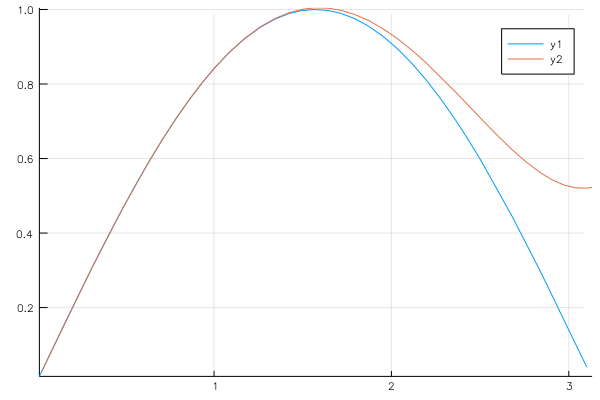

In [1]:
using Plots
plot([f, x -> polyval(g, x)], 0, pi)

<h3>Polynomial interpolation</h3>

<p>We discussed that there exists a unique polynomial of degree $n$ or less that goes through the points $(x_i, f(x_i))$ for $i=0, 1, \dots, n$. We gave a formula in terms of <em>divided differences</em>. This is due to Newton. Lagrange gave an alternate form. Let</p>


$$
l_i(x) = \prod_{j=0, j\neq i}^n \frac{x - x_j}{x_i-x_j}.
$$


<p>Then, $p(x) = \sum_0^n f(x_i)l_i(x)$ so for $n+1$ points chosen in $[a,b]$ we have</p>


$$
\int_a^b f(x) dx \approx \int_a^b p(x) dx = \int_a^b \sum f(x_i) l_i(x) dx = \sum f(x_i) \int_a^b l_i(x) dx.
$$


<p>If $A_i = \int_a^b l_i(x) dx$, then we have the integral is approximately $\sum A_i f(x_i)$. (The $A_i$ do not depend on $f$, so could in theory be pre-computed.)</p>

<blockquote>
<p>A <a href="https://en.wikipedia.org/wiki/Newton&#37;E2&#37;80&#37;93Cotes_formulas">Newton-Cotes</a> formula is one where the $x_i$ are equally spaced over $[a,b]$.</p>
</blockquote>

<p>Issues here are related to the approximating polynomials getting squirrelly out near the ends of the interval (Runge phenomenon).</p>

<h2>Riemann integration</h2>

<p>Consider the easiest case $x_0$ some point in $[a,b]$. Then we have the approximate integral: $f(x_0)(b-a)$.</p>

<p>What is the error? We know that the error using $n+1$ points is $f(x) - p(x) = f^{(n+1)}(\xi_x)/(n+1)! (x-x_0)\cdots(x-x_n)$, so in this case we have:</p>


$$
\begin{align}
\int_a^b f(x) dx - \int_a^b p(x) &=
\int_a^b (f(x) - p(x)) dx\\
&= \int_a^b f'(\xi_x)(x-x_0) dx\\
&\approx f'(\xi) \frac{(x-x_0)^2}{2} \mid_a^b
\end{align}
$$


<p>If we were to take $x_0 = a$, then this becomes $f'(\xi)(b-a)^2/2$. So it depends on the length of the interval and the derivative.</p>

<h2>Trapezoid rule</h2>

<p>Now suppose, $x_0=a, x_1=b$. So $n=1$. Then we have the trapezoid rule. We have then</p>


$$
l_0(x) = \frac{b-x}{b-a}, \quad \text{ and } l_1(x) = \frac{x-a}{b-a}
$$


<p>And $A_0 = A_1 = (b-a)/2$.</p>

<p>So, $\int_a^b f(x) dx \approx f(x_0)A_0 + f(x_1) A_1 = (b-a)/2 \cdot (f(a)  + f(b))$. The formula for the trapezoid.</p>

<p>To compute the error, we have $f(x) - p(x) = f''(\xi_x)/2 (x-a)(x-b)$. Is we write:</p>


$$
\int_a^b (f(x) - p(x))dx  = -\int_a^b  f''(\xi_x)/2 (x-a)(x-b) dx = -f''(\xi) \int_a^b (x-a)(x-b)/2 dx = -f''(\xi) (b-a)^3/12.
$$


<p>Again, the error depends on the length of the integral cubed. </p>

<h3>The more familiar trapezoid rule:</h3>

<p>Take the partition $a=x_0 < x_1 < \cdots < x_{n-1} < x_n = b$ and apply the trapezoid rule to each pair. This will give an approximation formula. Suppose $x_i = a + (b-a)/n \cdot i$. Then the formulas become:</p>


$$
\int_a^b f(x) dx \approx \frac{h}{2}(f(a) + 2 \sum_{i=1}^{n-1} f(a + ih) + f(b)), \quad h=(b-a)/2.
$$


<p>The errors add to give:</p>


$$
\text{error } = -\sum_i^n f''(\xi_i) h^3/12 \approx -nf''(\xi) h^3/12 =- f''(\xi) \frac{(b-a)^3}{12n^2}.
$$


<h2>Simpson's rule</h2>

<p>Using the points $a = x_0 < x_1 < x_2=b$ with $x_1$ the midpoint, yields Simpson's rule.</p>

<p>The approximation becomes:</p>


$$
\int_a^b f(x) dx = \frac{b-a}{6}(f(a) + 4f(\frac{a+b}{2}) + f(b))
$$


<p>With error, $-1/90 \cdot ((b-a)/2)^5 f^{(4)}(\xi)$.</p>

<p>If we apply over an equally spaced partition, the errors accumulate to yield</p>


$$
\text{Simpson's error} = -\frac{1}{180} \frac{(b-a)^5}{n^4} f^{(4)}(\xi)
$$


<h3>Compare.</h3>

<p>We can numerically compare these errors.</p>

In [1]:
riemann(f, a,b) = f(a)*(b-a)
trapezoid(f,a,b) = 1/2 * (b-a)*(f(b)  + f(a))
simpson(f, a, b) = (b-a)/6*(f(a) + 4f((a+b)/2) + f(b))

simpson (generic function with 1 method)

<p>Let's look at $f(x) = e^x$ between $0$ and $\log(2)$ with an answer of $e^{log(2)} - e^0 = 2 - 1 = 1$.</p>

In [1]:
n = 10
a,b = 0, log(2)
xs = linspace(a, b, n+1)
xis = zip(xs[1:end-1], xs[2:end])
f(x) = exp(x)


r = sum([riemann(f, xi, xi1) for (xi,xi1) in xis])
t = sum([trapezoid(f, xi, xi1) for (xi,xi1) in xis])
s = sum([simpson(f, xi, xi1) for (xi,xi1) in xis])

[r-1 t-1 s-1]

1×3 Array{Float64,2}:
 -0.034257  0.000400345  8.01396e-9

<h2>Change of variables</h2>

<p>If we have a formula to approximate $\int_c^d f(x) dx$ then we can do a linear $u$-substitution to integrate over $[a,b]$. The transform is</p>


$$
u(t) = \frac{b-a}{d-c}t + \frac{ad - bc}{d-c}
$$


<p>And then</p>


$$
\int_a^b f(x) dx = \frac{b-a}{d-c}\int_c^d f(u(t)) dt.
$$


<p>It is conventional to use $a=-1, b=1$.</p>

<h2>Weight functions</h2>

<p>The Newton-Cotes formulas can be generalized to handle integrals with weight functions:</p>


$$
\int_a^b f(x) w(x) dx \approx \int_a^b \sum f(x_i) l_i(x) w(x) dx = \sum f(x_i) \int_a^b l_i(x) w(x) = \sum f(x_i) A_i.
$$


<p>As before, only with the weight function defining $A$. Again, the $A_i$ do not depend on $x$. If we have $a,b=-1,1$, then they only depend on how the $x_i$ are chosen.</p>

<h3>Choosing the $x_i$ differently</h3>

<p>Integrating the general error term and assuming $|f^{(n+1)}(\xi) | \leq M$ we have</p>


$$
| \int_a^b f(x) dx - \sum A_i f(x_i)| \leq \frac{M}{(n+1)!}  \int_a^b \prod|x - x_i| dx.
$$


<p>Some choice of $x_i$ will <em>minimize</em> this product.</p>

<p>Claim: For $a=-1, b=1$, the following will minimize:</p>


$$
x_i = \cos(\frac{(i+1)\pi}{n+2}), \quad 0 \leq i \leq n.
$$


<p>Let's investigate:</p>

In [1]:
using Interact, Plots, QuadGK

xs = linspace(-1,1, 251)
f(xs) =  x -> prod([abs(x-xi) for xi in xs])

@manipulate for x0=xs, x1=xs, x2=xs, x3=xs
vs = [x0,x1,x2,x3]
v = QuadGK.quadgk(f(vs), -1, 1)[1]
plot(f(vs), -1, 1)
title!(string(v))
end

<p>How to compare:</p>

In [1]:
n = 3
i = 0:n
cos.((i+1)*pi/(n+2))

4-element Array{Float64,1}:
  0.809017
  0.309017
 -0.309017
 -0.809017

<p>These values are the zeros of the function</p>


$$
U_{n+1}(x) = \frac{\sin((n+2)\theta)}{\sin(\theta)}, \quad x = \cos(\theta).
$$


<p>These functions are polynomials in $x$! Called the Chebyshev polynomials of the second kind.</p>

<p>They have leading coefficient $2^{n+1}$, as</p>


$$
\int_{-1}^1 |\prod (x-x_i)| dx = 2^{-n}
$$


<p>With these nodes, one can minimize the error bound to get:</p>


$$
|\text{error}| \leq \frac{M}{(n+1)! 2^n}.
$$


<blockquote>
<p>Thm (p487): For monic polynomials $p$ of degree $n$, the Chebyshev polynomials minimize $\int_{-1}^1 |p(x)| dx$.</p>
</blockquote>